In [31]:
%matplotlib inline

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd

In [33]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [44]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [45]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [46]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [47]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [48]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [49]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [50]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [51]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [42]:
def str_to_date(str_time):
    return dt.datetime.strptime(str_time,'%Y-%m-%d').date()
all_dates = session.query(Measurement.date).group_by(Measurement.date).order_by(Measurement.date.desc()).all()
all_dates = list(np.ravel(all_dates))
first_date = str_to_date(all_dates[-1])
last_date = str_to_date(all_dates[0])

print(f"There are {len(all_dates)} days in total, {str}")
print(f"First date: {first_date}.")
print(f"Last date: {last_date}.")

There are 2792 days in total, <class 'str'>
First date: 2010-01-01.
Last date: 2017-08-23.


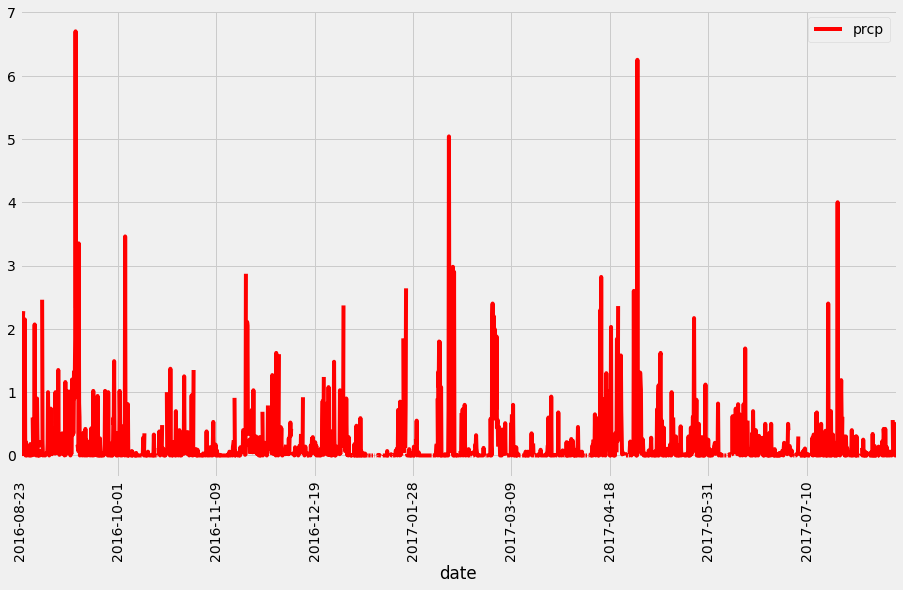

In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results, .all returns in list tuples
result=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >='2016-08-23').all()
prcp_df=pd.DataFrame(result)



prcp_df=prcp_df.sort_values(by=['date'])

prcp_df.head()


prcp_df.plot(x='date',y='prcp',color='red',figsize=(14,8),rot=90)

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data






In [76]:
prcp_df.tail()

,date,prcp
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08
2229,2017-08-23,0.45


![precipitation](Images/precipitation.png)

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df1 = pd.DataFrame(prcp_df, columns=['dates', 'precipitation'])
prcp_df1
#prcp_df2 = prcp_df.set_index("dates", inplace=True)
prcp_df2 = prcp_df1.dropna(how='any')
prcp_df2.tail()


,dates,precipitation


In [79]:
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [82]:
# Design a query to show how many stations are available in this dataset?


x=session.query(Station.id).count()

print(f"There are {x} stations available in this dataset")


There are 9 stations available in this dataset


In [85]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
h_df = pd.read_csv("Resources/hawaii_measurements.csv")
h_df

sel = [Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
station_data = session.query(*sel).all()
station_data

station_df = pd.DataFrame(station_data, columns=['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
station_df

merge_table = pd.merge(station_df, h_df, on="station")
merge_table

grouped_station = merge_table.groupby(['station'])
grouped_station.count().head(10)

grouped_station["station"].count().sort_values(ascending=False)


station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [87]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

df5 = merge_table.loc[merge_table["station"] == "USC00519281", :]
df5.set_index("station", inplace=True)

#prcp_df2 = prcp_df.set_index("dates", inplace=True)
min_temp = df5["tobs"].min()
max_temp = df5["tobs"].max()
avg_temp = df5["tobs"].mean()

print(min_temp, max_temp, avg_temp)



54 85 71.66378066378067


In [88]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
start_date = '2016-08-18'
end_date = '2017-08-18'
mask = (df5['date'] >= start_date) & (df5['date'] <= end_date)
df5_12 = df5.loc[mask]
df5_12.head()


,id,name,latitude,longitude,elevation,date,prcp,tobs
station,,,,,,,,
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-18,0.00,80
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-19,0.31,79
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-20,0.13,81
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-21,0.08,79
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-22,2.32,78


![precipitation](Images/station-histogram.png)

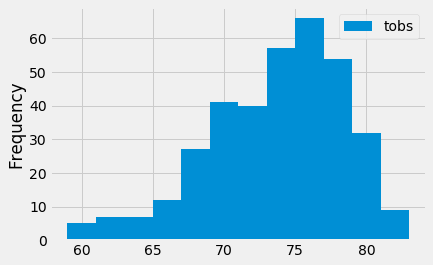

In [90]:
x_axis = df5_12["tobs"].values
plt.hist(x_axis, bins=12, label="tobs")
plt.ylabel("Frequency")
plt.legend()

In [91]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [97]:
hm_df_sorted = hm_df.sort_values("date")
hm_df_sorted

hm_df_sorted['date'] = pd.to_datetime(hm_df_sorted['date'],format="%Y/%m/%d")
hm_df_sorted['date'].dtype
        
hm_df_sorted['month_of_date'] = hm_df_sorted['date'].dt.month
hm_df_sorted

grouped_hm_df_sorted = hm_df_sorted.groupby(['month_of_date'])

avg_temp_df = pd.DataFrame(grouped_hm_df_sorted.mean().head(12))
avg_temp_df
avg_temp_june = float(avg_temp_df.loc[6, "tobs"])
avg_temp_dec = float(avg_temp_df.loc[12, "tobs"])
print(f"The average temperature in June is {avg_temp_june} and the averge temperature in December is {avg_temp_dec}")

hm_df_sorted
hm_df_sorted2 = hm_df_sorted.dropna(how='any')

cat1 = hm_df_sorted2[hm_df_sorted2['month_of_date']==6]
cat2 = hm_df_sorted2[hm_df_sorted2['month_of_date']==12]


#ttest_ind(cat1['tobs'], cat2['tobs'])

The average temperature in June is 74.94411764705882 and the averge temperature in December is 71.04152933421226


In [98]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):

    sd = dt.datetime.strptime(start_date, '%Y-%m-%d')
    ed = dt.datetime.strptime(end_date, '%Y-%m-%d')

    hm2 = pd.DataFrame(hm_df_sorted[['date','tobs']])
    hm2['date'] = pd.to_datetime(hm2['date'],format="%Y/%m/%d")

    hm3 = pd.DataFrame(hm2.loc[(hm2["date"] >= sd) & (hm2["date"] <= ed), : ])

    hm3_min = hm3["tobs"].min()
    hm3_max = hm3["tobs"].max()
    hm3_mean = hm3["tobs"].mean()
    stats_dict = {"Min": hm3_min, "Max": hm3_max, "Avg": hm3_mean}
    return stats_dict

In [99]:
calc_temps('2012-02-28', '2012-03-05')

{'Min': 62, 'Max': 74, 'Avg': 69.57142857142857}

In [100]:

# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2011-02-28', '2011-03-05')

{'Min': 61, 'Max': 75, 'Avg': 69.75510204081633}

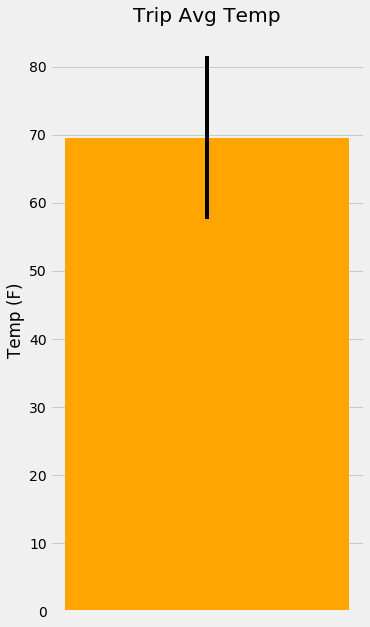

In [102]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(5)
ax.get_xaxis().set_ticks([])
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
error = 74-62
ax.bar("2012-02-28 to 2012-03-05", 69.57142857142857, color = "orange", yerr=error)
ax.grid(True)


In [104]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
him = pd.read_csv("Resources/hawaii_measurements.csv")
his = pd.read_csv("Resources/hawaii_stations.csv")

hawaii_merge = pd.merge(him, his, on="station")
hawaii_merge
hawaii_merge['date'] = pd.to_datetime(hawaii_merge['date'],format="%Y/%m/%d")

td1 = dt.datetime.strptime("2011-02-28", '%Y-%m-%d')
td2 = dt.datetime.strptime("2011-03-05", '%Y-%m-%d')

hawaii_merge2 = pd.DataFrame(hawaii_merge.loc[(hawaii_merge["date"] >= td1) & (hawaii_merge["date"] <= td2), : ])
hawaii_merge2

hawaii_merge3 = pd.DataFrame(hawaii_merge2.groupby("station").sum().head(12)).sort_values("prcp", ascending=False)
hawaii_merge3

hawaii_name = pd.DataFrame(his[["station","name"]])
hawaii_name
hawaii_merge4 = pd.merge(hawaii_merge3, hawaii_name, on="station")
hawaii_merge4
hawaii_final = pd.DataFrame(hawaii_merge4[['station', 'name', 'prcp', 'latitude', 'longitude', 'name']])
hawaii_final


,station,name,prcp,latitude,longitude,name
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",2.33,107.49600,-790.05550,"UPPER WAHIAWA 874.3, HI US"
1,USC00519281,"WAIHEE 837.5, HI US",2.23,128.71002,-947.09334,"WAIHEE 837.5, HI US"
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2.19,128.01336,-946.26834,"WAIMANALO EXPERIMENTAL FARM, HI US"
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.96,129.12780,-947.02440,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",1.45,127.99860,-946.81500,"MANOA LYON ARBO 785.2, HI US"
5,USC00513117,"KANEOHE 838.1, HI US",1.44,128.54040,-946.80900,"KANEOHE 838.1, HI US"
6,USC00519397,"WAIKIKI 717.2, HI US",1.38,127.62960,-946.90080,"WAIKIKI 717.2, HI US"
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.63,106.57600,-789.99600,"HONOLULU OBSERVATORY 702.2, HI US"
8,USC00517948,"PEARL CITY, HI US",0.00,64.18020,-473.92530,"PEARL CITY, HI US"


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


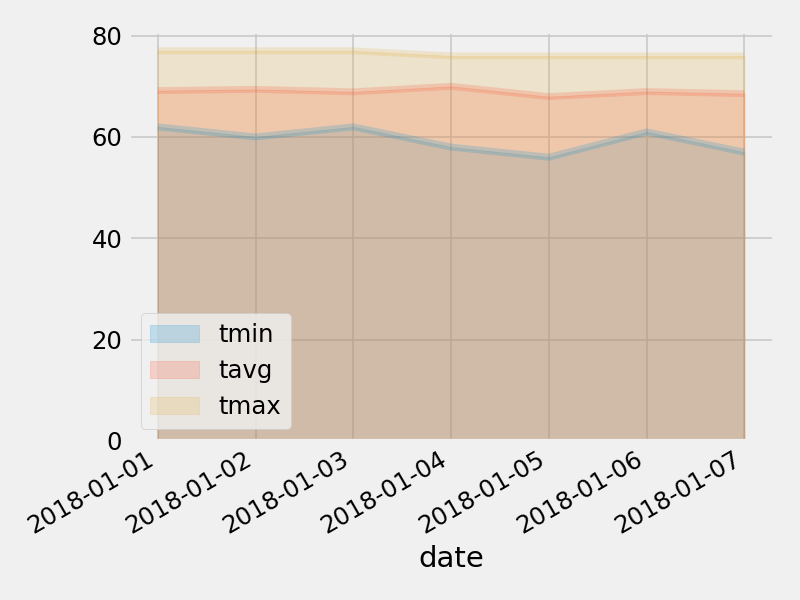

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
